In [ ]:
https://raw.githubusercontent.com/justmarkham/pycon-2018-tutorial/master/police.csv

In [1]:
import pandas as pd

In [8]:
df = pd.read_excel('C:/Users/skesh/Downloads/sample_file.xlsx',sheet_name='Detail_Sheet_F001')
df

,User Name,First Name,Last Name,User Lock Status,F-90,F-91,M-01
0,RUREN,Ren,Ruoxin,0,3,1,1


In [9]:
df.columns

Index(['User Name', 'First Name', 'Last Name', 'User Lock Status', 'F-90',
       'F-91', 'M-01'],
      dtype='object')

In [11]:
df = df.set_index(['User Name', 'First Name', 'Last Name', 'User Lock Status'])
df

,,,,F-90,F-91,M-01
User Name,First Name,Last Name,User Lock Status,,,
RUREN,Ren,Ruoxin,0,3,1,1


In [12]:
df.stack()

User Name  First Name  Last Name  User Lock Status      
RUREN      Ren         Ruoxin     0                 F-90    3
                                                    F-91    1
                                                    M-01    1
dtype: int64

In [13]:
df.stack().reset_index()

,User Name,First Name,Last Name,User Lock Status,level_4,0
0,RUREN,Ren,Ruoxin,0,F-90,3
1,RUREN,Ren,Ruoxin,0,F-91,1
2,RUREN,Ren,Ruoxin,0,M-01,1


In [14]:
df.stack().reset_index().rename(columns = {'level_4':'Category',0:'Score'})

,User Name,First Name,Last Name,User Lock Status,Category,Score
0,RUREN,Ren,Ruoxin,0,F-90,3
1,RUREN,Ren,Ruoxin,0,F-91,1
2,RUREN,Ren,Ruoxin,0,M-01,1


In [15]:
df = pd.read_excel('C:/Users/skesh/Downloads/sample_file.xlsx',sheet_name='Detail_Sheet_F001')

df.set_index(['User Name',
              'First Name',
              'Last Name',
              'User Lock Status']).stack().reset_index().rename(columns = {'level_4':'Category',0:'Score'})

,User Name,First Name,Last Name,User Lock Status,Category,Score
0,RUREN,Ren,Ruoxin,0,F-90,3
1,RUREN,Ren,Ruoxin,0,F-91,1
2,RUREN,Ren,Ruoxin,0,M-01,1


In [ ]:
Either call the sheets by sheetname or by their index value

In [19]:
df = pd.DataFrame()
for i in range(0,11):
    df1 = pd.read_excel('C:/Users/skesh/Downloads/sample_file.xlsx',sheet_name=i)
    
    
    df1 = df1.set_index(['User Name',
              'First Name',
              'Last Name',
              'User Lock Status']).stack().reset_index().rename(columns = {'level_4':'Category',0:'Score'})
    
    df = pd.concat([df,df1])
df

,User Name,First Name,Last Name,User Lock Status,Category,Score
0,RUREN,Ren,Ruoxin,0,F-90,3.0
1,RUREN,Ren,Ruoxin,0,F-91,1.0
2,RUREN,Ren,Ruoxin,0,M-01,1.0
0,RUREN,Ren,Ruoxin,0,F-90,3.0
1,RUREN,Ren,Ruoxin,0,F-91,1.0
...,...,...,...,...,...,...
12,MANJULAREDDY,Manjula,Neeloor Laxmana Reddy,0,F110S.1,1.0
13,MANJULAREDDY,Manjula,Neeloor Laxmana Reddy,0,F110,21.0
14,MCHOKSI,Munish,Choksi,0,F-02,1.0
15,MCHOKSI,Munish,Choksi,0,FB01,1.0


In [21]:
df = pd.read_excel('C:/Users/skesh/Desktop/Interview Questions Data Engineer.xlsx',sheet_name=0)
df

,Name,Score,Subject
0,Ali,56,Phy
1,Mohd,81,Chem
2,Kunal,62,Phy
3,Tej,51,Chem


#### Q1. fetch the name and score of top scorer of each subject

In [22]:
grps = df.groupby('Subject')

In [23]:
grps.ngroups

2

In [26]:
for name,group in grps:
    #print(name,'\n',group)
    print(group[group['Score']==group['Score'].max()])

   Name  Score Subject
1  Mohd     81    Chem
    Name  Score Subject
2  Kunal     62     Phy


In [30]:
for name,group in grps:
    #print(name,'\n',group)
    print(group.sort_values(by='Score',ascending=False).reset_index(drop=True))

   Name  Score Subject
0  Mohd     81    Chem
1   Tej     51    Chem
    Name  Score Subject
0  Kunal     62     Phy
1    Ali     56     Phy


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pycon-2018-tutorial/master/police.csv')
df

In [33]:
df = pd.read_csv('C:/Users/skesh/Downloads/new.csv')
df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


#### 1. Remove columns containing missing values only

In [37]:
df.shape

(91741, 15)

In [36]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [38]:
df.drop(columns = 'county_name',inplace=True)

In [39]:
df.shape

(91741, 14)

#### 2. Who overspeeds more men or women?

In [42]:
df[df['violation']=='Speeding']

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91734,2015-12-31,20:20,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91735,2015-12-31,20:25,M,1992.0,23.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [44]:
df[df['violation']=='Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

#### when a man is pulled over how often is it for overspeeding?

In [46]:
df[df.driver_gender == 'M'].violation.value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [47]:
df[df.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

#### when a woman is pulled over how often is it for overspeeding?

In [50]:
df[df.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [53]:
#combining both above lines together
df.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

#### Q3. Does gender affect who is getting searched?

In [56]:
df.search_conducted.unique()

array([False,  True])

In [57]:
df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [58]:
df.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [59]:
df.search_conducted.mean()

0.03483720473942948

In [60]:
3196/(3196 + 88545)

0.03483720473942948

In [61]:
df.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

#### Males are searched twice as Females

In [64]:
df.groupby(['driver_gender','driver_race','violation']).search_conducted.mean()

driver_gender  driver_race  violation          
F              Asian        Equipment              0.040000
                            Moving violation       0.017857
                            Other                  0.166667
                            Registration/plates    0.000000
                            Seat belt              0.000000
                            Speeding               0.005051
               Black        Equipment              0.066937
                            Moving violation       0.041096
                            Other                  0.010526
                            Registration/plates    0.080000
                            Seat belt              0.012987
                            Speeding               0.028754
               Hispanic     Equipment              0.040921
                            Moving violation       0.037135
                            Other                  0.047059
                            Registration/plates    0

In [63]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

#### Q4. During a search how often was someone frisked?

In [66]:
df.violation.unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

In [79]:
df.search_type.value_counts() #value_counts by default hides the null values

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Fris

Use - I need to keep a count of all the stoppagges when someone is asked to frisk

technically - everytime i see the word frisk in column search_type i should record that

In [73]:
df['Frisk'] = df.search_type.str.contains('Frisk')

In [81]:
df['Frisk'].value_counts(dropna=False,normalize=True)

NaN      0.965163
False    0.031851
True     0.002987
Name: Frisk, dtype: float64

#### Q5. Which year had least/most no. of stops

In [96]:
#1st method
df['year'] = df.stop_date.str.slice(0,4)

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_date, Length: 91741, dtype: object

In [103]:
df.stop_date.str.slice(0,4).value_counts().tail(1)

2005    2558
Name: stop_date, dtype: int64

In [102]:
df.stop_date.str.slice(0,4).value_counts().head(1)

2012    10970
Name: stop_date, dtype: int64

In [136]:
#2nd method
combined = df.stop_date.str.cat(df.stop_time,sep=' ')

In [137]:
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object

In [110]:
df['DateTime'] = pd.to_datetime(combined)

In [130]:
df['DateTime'].dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: DateTime, dtype: int64

In [131]:
df['DateTime'].dt.year.value_counts().index

Int64Index([2012, 2006, 2007, 2014, 2008, 2015, 2011, 2013, 2009, 2010, 2005], dtype='int64')

In [132]:
df['DateTime'].dt.year.value_counts().index[0]

2012

#### Q6. How does drug activity change by time of the day?

In [140]:
df.drugs_related_stop.value_counts(dropna=False)

False    90926
True       815
Name: drugs_related_stop, dtype: int64

In [141]:
df.drugs_related_stop.mean()

0.008883705213590434

In [143]:
df.groupby(df['DateTime'].dt.hour).drugs_related_stop.mean()

DateTime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

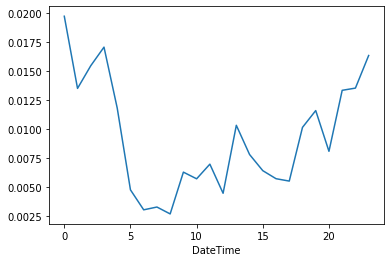

In [144]:
df.groupby(df['DateTime'].dt.hour).drugs_related_stop.mean().plot()

#### Q7. DO most stopages occur at night?

In [147]:
df['DateTime'].dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: DateTime, dtype: int64

In [149]:
df['DateTime'].dt.hour.value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: DateTime, dtype: int64

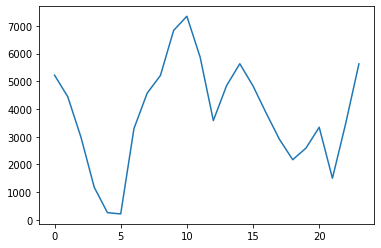

In [152]:
df['DateTime'].dt.hour.value_counts().sort_index().plot()

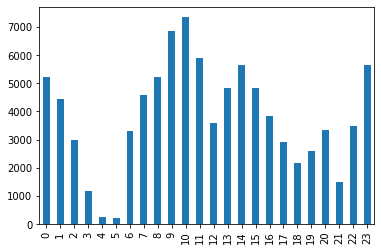

In [151]:
df['DateTime'].dt.hour.value_counts().sort_index().plot(kind = 'bar')

In [156]:
df.driver_gender.replace('M','Male',inplace=True)

In [157]:
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Frisk,DateTime
0,2005-01-02,01:55,Male,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,Male,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,Male,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,Male,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,Male,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:27:00
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:35:00
91738,2015-12-31,20:45,Male,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:45:00
91739,2015-12-31,21:42,Male,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 21:42:00


#### Webscrapping

In [ ]:
https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html

1. HTML contains tags

2. Tags can have attributes

3. Tags can be nested

In [ ]:
The code shoult have a pattern

In [ ]:
<span class="short-desc"><strong>Jan. 21&nbsp;</strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” 
<span class="short-truth">
<a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">
(He was for an invasion before he was against it.)
</a>
</span>
</span>

&nbsp;&nbsp;
<span class="short-desc"><strong>Jan. 21&nbsp;</strong>“A reporter for Time magazine — and I have been on their cover 14 or 15 times. I think we have the all-time record in the history of Time magazine.” 
<span class="short-truth"><a href="http://nation.time.com/2013/11/06/10-things-you-didnt-know-about-time/" target="_blank">
(Trump was on the cover 11 times and Nixon appeared 55 times.)
</a>
</span>
</span>

In [158]:
import requests

In [159]:
r = requests.get('https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html')

In [161]:
r.text

'<!DOCTYPE html>\n<!--[if (gt IE 9)|!(IE)]> <!--><html lang="en" class="no-js page-interactive section-opinion page-theme-standard tone-opinion page-interactive-default limit-small layout-xlarge app-interactive" itemid="https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html" itemtype="http://schema.org/NewsArticle" itemscope xmlns:og="http://opengraphprotocol.org/schema/"><!--<![endif]-->\n<!--[if IE 9]> <html lang="en" class="no-js ie9 lt-ie10 page-interactive section-opinion page-theme-standard tone-opinion page-interactive-default limit-small layout-xlarge app-interactive" xmlns:og="http://opengraphprotocol.org/schema/"> <![endif]-->\n<!--[if IE 8]> <html lang="en" class="no-js ie8 lt-ie10 lt-ie9 page-interactive section-opinion page-theme-standard tone-opinion page-interactive-default limit-small layout-xlarge app-interactive" xmlns:og="http://opengraphprotocol.org/schema/"> <![endif]-->\n<!--[if (lt IE 8)]> <html lang="en" class="no-js lt-ie10 lt-ie9 lt-ie8 page-i

#### Parsing the HTML using library called Beautiful Soup

In [162]:
from bs4 import BeautifulSoup # is reading the html elements and making sense out of it.
#it contains methods which lets us directly find and manipulate with html elements like tags

In [163]:
obj = BeautifulSoup(r.text,'html.parser')

In [ ]:
# <span class="short-desc"><strong> DATE </strong> LIE <span class="short-truth"> <a href URL>
# EXPLANATION
# </a>
# </span>
# </span>

In [176]:
#results = obj.find_all('span',attrs={'class':'short-desc'})
results = obj.find_all('span',attrs={'class':'short-desc'})

In [174]:
results[0]

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

In [177]:
first_block = results[0]

In [178]:
first_block

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

In [179]:
type(first_block)

bs4.element.Tag

#### Extracting the Date

In [180]:
first_block.find('strong')

<strong>Jan. 21 </strong>

In [181]:
first_block.find('strong').text

'Jan. 21\xa0'

In [182]:
first_block.find('strong').text[:-1]

'Jan. 21'

#### Extracting the lie

In [183]:
first_block

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

In [184]:
first_block.contents

[<strong>Jan. 21 </strong>,
 "“I wasn't a fan of Iraq. I didn't want to go into Iraq.” ",
 <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span>]

In [ ]:
children - things which are nested inside a tag

In [185]:
first_block.contents[1]

"“I wasn't a fan of Iraq. I didn't want to go into Iraq.” "

In [186]:
first_block.contents[1][1:-2]

"I wasn't a fan of Iraq. I didn't want to go into Iraq."

#### Extracting the Explanation

In [187]:
first_block.find('a')

<a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a>

In [188]:
first_block.find('a').text

'(He was for an invasion before he was against it.)'

In [189]:
first_block.find('a').text[1:-1]

'He was for an invasion before he was against it.'

#### Extracting the URL

In [191]:
first_block.find('a')

<a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a>

In [192]:
first_block.find('a')['href']

'https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the'

In [194]:
results

[<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>,
 <span class="short-desc"><strong>Jan. 21 </strong>“A reporter for Time magazine — and I have been on their cover 14 or 15 times. I think we have the all-time record in the history of Time magazine.” <span class="short-truth"><a href="http://nation.time.com/2013/11/06/10-things-you-didnt-know-about-time/" target="_blank">(Trump was on the cover 11 times and Nixon appeared 55 times.)</a></span></span>,
 <span class="short-desc"><strong>Jan. 23 </strong>“Between 3 million and 5 million illegal votes caused me to lose the popular vote.” <span class="short-truth"><a href="https://www.nytimes.com/2017/01/23/us/politics/donald-trump-congress-democrats.html" target="_

In [197]:
DATE = results[179].find('strong').text[:-1]
LIE = results[179].contents[1][1:-2]
EXP = results[179].find('a').text[1:-1]
URL = results[179].find('a')['href']
print(DATE,'\n',LIE,'\n',EXP,'\n',URL)

Nov. 11 
 I'd rather have him  – you know, work with him on the Ukraine than standing and arguing about whether or not  – because that whole thing was set up by the Democrats. 
 There is no evidence that Democrats "set up" Russian interference in the election. 
 https://www.nytimes.com/interactive/2017/12/10/us/politics/trump-and-russia.html


In [201]:
#write a loop and collect all the 180 blocks together
l1 = []
for i in range(len(results)):
    DATE = results[i].find('strong').text[:-1]
    LIE = results[i].contents[1][1:-2]
    EXP = results[i].find('a').text[1:-1]
    URL = results[i].find('a')['href']
    l1.append((DATE,LIE,EXP,URL))

In [205]:
import pandas as pd

In [206]:
df = pd.DataFrame(l1)

In [209]:
df.columns = ['Date','Lie','Explanation','URL']

In [210]:
df

,Date,Lie,Explanation,URL
0,Jan. 21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
1,Jan. 21,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
2,Jan. 23,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
3,Jan. 25,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
4,Jan. 25,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...
...,...,...,...,...
175,Oct. 25,We have trade deficits with almost everybody.,We have trade surpluses with more than 100 cou...,https://www.bea.gov/newsreleases/international...
176,Oct. 27,"Wacky & totally unhinged Tom Steyer, who has b...",Steyer has financially supported many winning ...,https://www.opensecrets.org/donor-lookup/resul...
177,Nov. 1,"Again, we're the highest-taxed nation, just ab...",We're not.,http://www.politifact.com/truth-o-meter/statem...
178,Nov. 7,When you look at the city with the strongest g...,"Several other cities, including New York and L...",http://www.politifact.com/truth-o-meter/statem...


In [212]:
#df.to_csv('Trump_Lies.csv',index=False)
df.to_excel('Webscrapping.xlsx',sheet_name='Trump',index=False)